In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from camelot import read_pdf
from random import randint

In [3]:
fhandle1=read_pdf("resources/pdf/2ND cet cycle test.pdf",flavor='lattice',pages='all')
fhandle2=read_pdf("resources/pdf/2ND NON cet cycle test.pdf",flavor='lattice',pages='all')
fhandle3=read_pdf("resources/pdf/2nd HOSTEL CYCLE TEST MARKS.pdf",flavor='lattice',pages='all')

### CREATING DATAFRAMES

In [4]:
page1=[]
page2=[]
page3=[]
for n in fhandle1:
    d=n.df
    d[9]="CET"
    page1.append(d)
for n in fhandle2:
    d=n.df
    d[9]="NONCET"
    page2.append(d)
for n in fhandle3:
    d=n.df
    d[9]="HOSTEL"
    page3.append(d)

In [5]:
df2=pd.concat(page1,copy=False,ignore_index=True)

In [6]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,"ADMAR, POORNAPRAJNA PU COLLEGE \nDEPARTMENT OF...",,,,,,,,,CET
1,,ROLL \nN0,NAME,PHYSICS,,CHEMISTRY MATHEMATICS BIO/Cs/STAT,,Total(%),,CET
2,,1,Krithi Y Shetty,16,23,24,25,88,,CET
3,,2,Krithika,20,23,24,22,89,,CET
4,,3,Kshama Shetty,14,19,20,20,73,,CET


In [7]:
df2.drop(columns=[0,8],inplace=True)
df2.head()

,1,2,3,4,5,6,7,9
0,,,,,,,,CET
1,ROLL \nN0,NAME,PHYSICS,,CHEMISTRY MATHEMATICS BIO/Cs/STAT,,Total(%),CET
2,1,Krithi Y Shetty,16,23,24,25,88,CET
3,2,Krithika,20,23,24,22,89,CET
4,3,Kshama Shetty,14,19,20,20,73,CET


In [8]:
df2.columns=["RollNo","Name","Physics","Chemistry","Maths","Bio/Cs/Stat","Total","Type"]
df2.head(1)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
0,,,,,,,,CET


In [9]:
df4=pd.concat(page3,copy=False,ignore_index=True)

In [10]:
df4.drop(columns=[0,8],inplace=True)
df4.head()

,1,2,3,4,5,6,7,9
0,,,,,,,,HOSTEL
1,ROLL \nN0,NAME,PHYSICS \n(Out of 25),CHEMISTRY \n(Out of 25),MATHEMATICS \n(Out of 25),BIO/Cs/\nSTAT \n(Out of 25),Total,HOSTEL
2,102,Adish Uday Naik,14,10,19,15,58%,HOSTEL
3,103,Akshath H P,21,20,20,22,83%,HOSTEL
4,104,Arya Gowda K P,13,13,13,17,56%,HOSTEL


In [11]:
df4.columns=["RollNo","Name","Physics","Chemistry","Maths","Bio/Cs/Stat","Total","Type"]
df4.head(1)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
0,,,,,,,,HOSTEL


In [12]:
df3=pd.concat(page2,copy=False,ignore_index=True)
df3.head()

,0,1,2,3,4,5,6,9
0,"ADMAR, POORNAPRAJNA PU COLLEGE \nDEPARTMENT OF...",,,,,,,NONCET
1,ROLL \nN0,NAME,,PHYSICS CHEMISTRY MATHS,,BIO/Cs/STAT,TOTAL,NONCET
2,60,Keerthana N Salian,11,13,03,11,FAIL,NONCET
3,61,Swathi,22,19,18,19,78,NONCET
4,62,Aryan M Chowta,15,11,17,13,56,NONCET


In [13]:
df3.columns=["RollNo","Name","Physics","Chemistry","Maths","Bio/Cs/Stat","Total","Type"]
df3.head(1)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
0,"ADMAR, POORNAPRAJNA PU COLLEGE \nDEPARTMENT OF...",,,,,,,NONCET


In [14]:
df5=pd.concat([df2,df3,df4],copy=False,ignore_index=True)
df5.head(2)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
0,,,,,,,,CET
1,ROLL \nN0,NAME,PHYSICS,,CHEMISTRY MATHEMATICS BIO/Cs/STAT,,Total(%),CET


In [15]:
df5.drop(df5[df5.Name==""].index,inplace=True)

In [16]:
df5["RollNo"].replace(r'[A-Za-z. ]',np.NaN,regex=True,inplace=True)
df5.dropna(inplace=True)

In [17]:
df5.head(2)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
2,1,Krithi Y Shetty,16,23,24,25,88,CET
3,2,Krithika,20,23,24,22,89,CET


# COPY

In [18]:
df1=df5.copy()

In [19]:
df1.Name=df1.Name.replace(r'\n',' ',regex=True)

In [20]:
df1.Name[df1.Name=="Meetha P"]="Meetha P Anchan"

In [21]:
df1.drop(df1[df1.Name=="Anchan"].index,inplace=True)

In [22]:
df1.index=np.arange(1,df1.index.size+1)

In [23]:
df1.head(2)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
1,1,Krithi Y Shetty,16,23,24,25,88,CET
2,2,Krithika,20,23,24,22,89,CET


### HANDLING "AB" IN MARK LIST

In [24]:
d=df1.query("Name=='Meetha P Anchan'").index

In [25]:
df1.loc[d]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
45,45,Meetha P Anchan,AB,AB,AB,AB,AB,CET


In [26]:
for sub in ["Physics","Chemistry","Maths","Bio/Cs/Stat"]:
    df1.loc[d,sub]=randint(20,25)

df1.loc[d]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
45,45,Meetha P Anchan,24,20,21,20,AB,CET


In [27]:
df1.loc[df1['Bio/Cs/Stat']=="AB"]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
40,40,Shreyas Poojary,18,14,15,AB,47,CET


In [28]:
df1.replace(["",'AB'],randint(13,20),inplace=True)

In [29]:
df1.iloc[37:42]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
38,38,Pranam,16,16,15,18,65,CET
39,39,Shravan Kumar,21,18,13,18,70,CET
40,40,Shreyas Poojary,18,14,15,13,47,CET
41,41,Skanda Kumar,15,14,11,11,51,CET
42,42,Anushka,19,19,22,25,85,CET


#### CHANGING DATA TYPE OF COLUMNS

In [30]:
df1=df1.astype({'Physics':np.uint8,'Chemistry':np.uint8,'Maths': np.uint8,'Bio/Cs/Stat':np.uint8})

In [31]:
df1.Total=df1.Physics+df1.Chemistry+df1.Maths+df1["Bio/Cs/Stat"]

In [32]:
df1.head()

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type
1,1,Krithi Y Shetty,16,23,24,25,88,CET
2,2,Krithika,20,23,24,22,89,CET
3,3,Kshama Shetty,14,19,20,20,73,CET
4,4,Pooja D Moolya,11,18,18,22,69,CET
5,5,Sneha S Prabhu,21,18,21,18,78,CET


In [33]:
df1["State"]="Fail"
df1.loc[df1.Total>35,"State"]="Pass"
df1.head(2)

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type,State
1,1,Krithi Y Shetty,16,23,24,25,88,CET,Pass
2,2,Krithika,20,23,24,22,89,CET,Pass


### WRITING PROCESSED DATA INTO EXCEL FILE

In [35]:
df1.to_excel("resources/Excel _sheets/Cycle test.xlsx","Mark_List 1",index=True)

# COPY

In [36]:
df6=df1.copy()

In [37]:
gby_type=df6.groupby("Type")

In [38]:
dc,dn,dh=gby_type.get_group("CET"),gby_type.get_group("NONCET"),gby_type.get_group("HOSTEL")

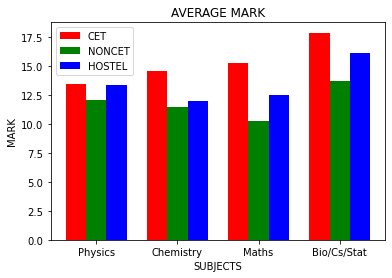

In [39]:
barwidth=0.25
br1=np.arange(4)
br2=[x+barwidth for x in br1]
br3=[x+barwidth for x in br2]
plt.xticks(br2,["Physics","Chemistry","Maths","Bio/Cs/Stat"])
plt.ylabel("MARK")
plt.xlabel("SUBJECTS")
plt.title("AVERAGE MARK")
plt.bar(br1,[dc.Physics.mean(),dc.Chemistry.mean(),dc.Maths.mean(),dc["Bio/Cs/Stat"].mean()],label="CET",color='r',width=barwidth)
plt.bar(br2,[dn.Physics.mean(),dn.Chemistry.mean(),dn.Maths.mean(),dn["Bio/Cs/Stat"].mean()],label="NONCET",color='g',width=barwidth)
plt.bar(br3,[dh.Physics.mean(),dh.Chemistry.mean(),dh.Maths.mean(),dh["Bio/Cs/Stat"].mean()],label="HOSTEL",color='b',width=barwidth)
plt.legend()
plt.show()

In [40]:
df6[df6.Total==df6.Total.max()]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type,State
11,11,N Radhesh Shetty,25,24,24,25,98,CET,Pass


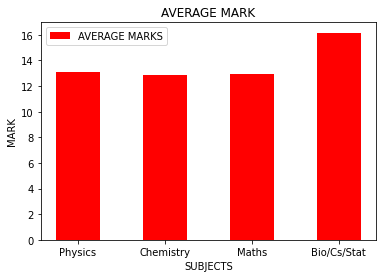

In [41]:
plt.xticks([1,2,3,4],["Physics","Chemistry","Maths","Bio/Cs/Stat"])
plt.ylabel("MARK")
plt.xlabel("SUBJECTS")
plt.title("AVERAGE MARK")
plt.bar([1,2,3,4],[df1.Physics.mean(),df1.Chemistry.mean(),df1.Maths.mean(),df1["Bio/Cs/Stat"].mean()],label="AVERAGE MARKS",color='r',width=0.5)
plt.legend()
plt.show()

In [42]:
df6[df6.Total>80]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type,State
1,1,Krithi Y Shetty,16,23,24,25,88,CET,Pass
2,2,Krithika,20,23,24,22,89,CET,Pass
6,6,Sushree Prabhu,22,21,21,21,85,CET,Pass
11,11,N Radhesh Shetty,25,24,24,25,98,CET,Pass
19,19,Keerthan Dinesh,22,13,24,25,84,CET,Pass
21,21,Vinit,20,16,23,23,82,CET,Pass
30,30,Thrisha U Shetty,25,23,24,25,97,CET,Pass
33,33,Ruchitha Prabhu,20,19,24,25,88,CET,Pass
42,42,Anushka,19,19,22,25,85,CET,Pass
43,43,Danica,18,21,21,23,83,CET,Pass


In [43]:
df6.loc[df6.Name=="Sujal AM"]

,RollNo,Name,Physics,Chemistry,Maths,Bio/Cs/Stat,Total,Type,State
14,14,Sujal AM,7,6,10,16,39,CET,Pass


In [44]:
df6.describe()

,Physics,Chemistry,Maths,Bio/Cs/Stat,Total
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,13.089744,12.839744,12.961538,16.166667,55.057692
std,6.734956,5.745682,7.550163,5.820801,23.104040
min,0.000000,0.000000,0.000000,2.000000,3.000000
25%,8.000000,9.000000,6.750000,12.000000,38.750000
50%,13.000000,12.500000,13.000000,17.000000,55.500000
75%,19.000000,17.000000,19.000000,20.250000,73.000000
max,25.000000,24.000000,25.000000,25.000000,98.000000
